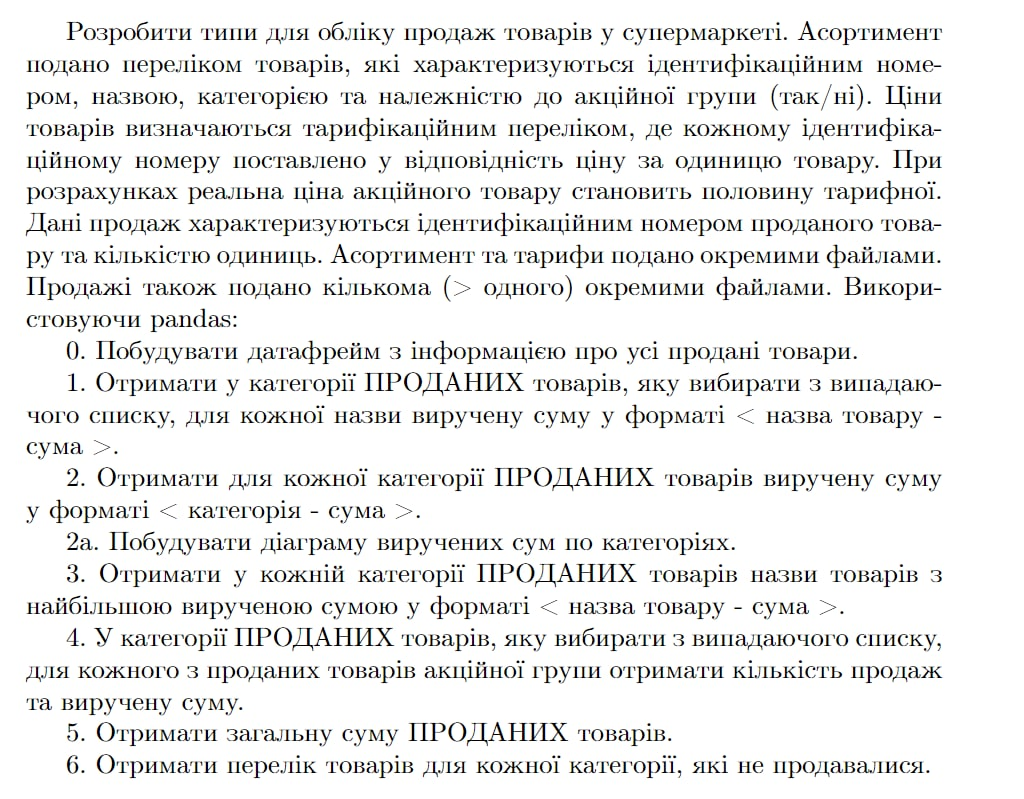

In [107]:
from IPython.display import Image
Image(filename='2021-01-03 23.03.29.jpg')

In [108]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
from matplotlib import pyplot as plt
from datetime import datetime

In [109]:
class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateFloat(func):
        def validateFloatWrapper(w, value):
            if not(isinstance(value, float)) and not(isinstance(value, int)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            return func(w, value)
        return validateFloatWrapper

    @staticmethod
    def validateInt(func):
        def validateIntWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            return func(w, value)
        return validateIntWrapper

    @staticmethod
    def validateSize(func):
        def validateSizeWrapper(w, value):
            if not(isinstance(value, int)) and not(isinstance(value, float)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateSizeWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper

    @staticmethod
    def validateDate(func):
        def validateDateWrapper(w, date):
            date = datetime.strptime(date, '%Y-%m-%d')
            return func(w, date)
        return validateDateWrapper

    @staticmethod
    def validateCard(func):
        def validateCardWrapper(w, value):
            if not value.isdigit():
                raise ValueError("mast contain only digits")
            return func(w, value)
        return validateCardWrapper

    @staticmethod
    def validateBool(func):
        def validateBoolWrapper(w, value):
            bools = ['yes', 'no', 'Yes', 'No', '0', '1', 0, 1, True, False, 'True', 'False']
            if value not in bools:
                raise ValueError("mast be boolean")
            return func(w, value)
        return validateBoolWrapper

In [110]:
class Tovar:
    def __init__(self, good_id, good_name, category, sale):
        self.good_id = good_id
        self.good_name = good_name
        self.category = category
        self.sale = sale

    @property
    def good_id(self):
        return self._good_id
    
    @good_id.setter
    @Validation.validateAmount
    def good_id(self, val):
        self._good_id = val
    
    @property
    def good_name(self):
        return self._good_name
    
    @good_name.setter
    @Validation.validateStr
    def good_name(self, val):
        self._good_name = val

    @property
    def category(self):
        return self._category

    @category.setter
    @Validation.validateStr
    def category(self, val):
        self._category = val

    @property
    def sale(self):
        return self._sale

    @sale.setter
    @Validation.validateBool
    def sale(self, val):
        self._sale = val

    def __str__(self):
        return f'good_id = {self.good_id}, good_name = {self.good_name}, category = {self.category},  sale={self.sale}'

    def __repr__(self):
        return f'good_id={self.good_id}, good_name={self.good_name}, category={self.category},  sale={self.sale}'

In [111]:
class Price:
    def __init__(self, good_id, price):
        self.good_id = good_id
        self.price = price
    

    @property
    def good_id(self):
        return self._good_id
    
    @good_id.setter
    @Validation.validateAmount
    def good_id(self, val):
        self._good_id = val
    
    @property
    def price(self):
        return self._price
    
    @price.setter
    @Validation.validateSize
    def price(self, val):
        self._price = val

    def __str__(self):
        return f'id = {self.good_id}, price = {self.price}'

    def __repr__(self):
        return f's_id={self.good_id}, price={self.price}'

In [112]:
class Sale:
    def __init__(self, good_id, amount):
        self.good_id = good_id
        self.amount = amount
    

    @property
    def good_id(self):
        return self._good_id
    
    @good_id.setter
    @Validation.validateAmount
    def good_id(self, val):
        self._good_id = val
    
    @property
    def amount(self):
        return self._amount
    
    @amount.setter
    @Validation.validateSize
    def amount(self, val):
        self._amount = val

    def __str__(self):
        return f'id = {self.good_id}, amount = {self.amount}'

    def __repr__(self):
        return f's_id={self.good_id}, amount={self.amount}'

In [113]:
def read_csv_file(file_name, t, objects):  
    try:
        with open(file_name, 'r') as v:
            r = csv.reader(v)
            next(r)
            for row in r:
                try:
                    objects.append(t(*row))
                except Exception as e:
                    print(f'{file_name}:\nline - {len(objects)}: {e}')
                    continue
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)

In [114]:
goods = []
prices = []
sales = []
read_csv_file("goods.csv", Tovar, goods)
read_csv_file("prices.csv", Price, prices)
read_csv_file("sales2.csv", Sale, sales)
read_csv_file("sales1.csv", Sale, sales)

goods, prices, sales

([good_id=11, good_name=applications, category=medicine,  sale=yes,
  good_id=12, good_name=fantastic, category=medicine,  sale=yes,
  good_id=13, good_name=plastic, category=food,  sale=no,
  good_id=14, good_name=lime, category=medicine,  sale=no,
  good_id=15, good_name=navigate, category=food,  sale=no,
  good_id=16, good_name=back-end, category=medicine,  sale=yes,
  good_id=17, good_name=wooden, category=internet,  sale=no,
  good_id=18, good_name=associate, category=internet,  sale=no,
  good_id=19, good_name=withdrawal, category=building,  sale=yes],
 [s_id=11, price=1300.0,
  s_id=12, price=250.0,
  s_id=13, price=45.0,
  s_id=14, price=1234.0,
  s_id=15, price=1410.0,
  s_id=16, price=467.0,
  s_id=17, price=123.0,
  s_id=18, price=455.0,
  s_id=19, price=900.0],
 [s_id=16, amount=13.0,
  s_id=17, amount=25.0,
  s_id=18, amount=26.0,
  s_id=11, amount=132.0,
  s_id=14, amount=37.0,
  s_id=12, amount=13.0,
  s_id=11, amount=11.0,
  s_id=12, amount=1.0,
  s_id=13, amount=35.0,


## Task 1
1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожної назви виручену суму у форматi < назва товару - сума >.

In [115]:
goods_dict = {(g.good_name, g) for g in goods} 
# for g in goods:
#     goods_dict[g.good_name] = g


@interact(good=goods_dict)
def choose1(good):
    price = 0
    for p in prices:
        for s in sales:
            if p.good_id == s.good_id and s.good_id == good.good_id: 
                price += p.price * s.amount
    # price = sum[p.price * s.amount for p in prices for s in sales if p.good_id == s.good_id]
    print(f"<{good.good_name} - {price}>")
  

interactive(children=(Dropdown(description='good', options=(('plastic', good_id=13, good_name=plastic, categor…

## Task 2
2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >.

In [116]:
categorie = {}
for p in prices:
    for s in sales:
        for a in goods:
            if p.good_id == s.good_id == a.good_id:
                categorie.setdefault(a.category, 0)
                categorie[a.category] += p.price * s.amount
                
for k, v in categorie.items():
    print(f"<{k} - {v}>")


<medicine - 287721.0>
<food - 52335.0>
<internet - 14905.0>


2а. Побудувати дiаграму виручених сум по категорiях.

In [117]:
def draw_histogram(x, y, x_label, y_label, title, line=True): 
    fig, ax = plt.subplots(figsize=(10, 7))
    if line:
        plt.plot(x, y, 'r--')
    ax.bar(x, y, color='#5499C7', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=50)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#B0C4DE')
    fig.patch.set_facecolor('#154360')         
    plt.show()

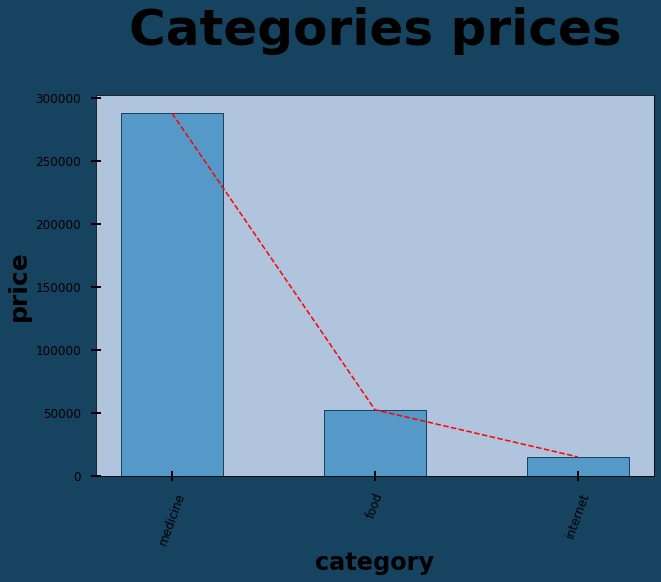

In [118]:
draw_histogram(list(categorie.keys()), list(categorie.values()), "category", "price", "Categories prices")

## Task 3
3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [119]:
categorie = {}
for p in prices:
    for s in sales:
        for a in goods:
            if p.good_id == s.good_id == a.good_id:
                categorie.setdefault(a.category, []).append((a.good_name, p.price * s.amount))
               
                
for k, v in categorie.items():
    print(f"<{k} - {max(v, key=lambda x: x[1])}>")


<medicine - ('applications', 171600.0)>
<food - ('navigate', 50760.0)>
<internet - ('associate', 11830.0)>


## Task 4
4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [120]:
goods_dict = {(g.good_name, g) for g in goods if g.sale == 'yes'} 

@interact(good=goods_dict)
def choose1(good):
    price = 0
    am = 0
    for p in prices:
        for s in sales:
            if p.good_id == s.good_id and s.good_id == good.good_id: 
                price += p.price * s.amount
                am += s.amount
    # price = sum[p.price * s.amount for p in prices for s in sales if p.good_id == s.good_id]
    print(f"<{good.good_name} - {price} - {am}>")

interactive(children=(Dropdown(description='good', options=(('back-end', good_id=16, good_name=back-end, categ…

## Task 5
5. Отримати загальну суму ПРОДАНИХ товарiв.

In [121]:
tot_price = 0
for p in prices:
    for s in sales:
        for a in goods:
            if p.good_id == s.good_id == a.good_id:
                tot_price += p.price * s.amount
print(f'total price = {tot_price}')

total price = 354961.0


# Task 6
6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [122]:
categorie = {}
for p in prices:
    for s in sales:
        for a in goods:
            if p.good_id == s.good_id == a.good_id and a.sale == 'no':
                categorie.setdefault(a.category, []).append((a.good_name))
               
                
for k, v in categorie.items():
    print(f"<{k} - {v}>")

<food - ['plastic', 'navigate']>
<medicine - ['lime', 'lime']>
<internet - ['wooden', 'associate']>


# With Pandas

In [123]:
goods = pd.read_csv("goods.csv")
prices = pd.read_csv("prices.csv")
sales = [pd.read_csv("sales1.csv"), pd.read_csv("sales2.csv")]

sales = pd.concat(sales, ignore_index=True).sort_values(by=['good_id', 'count']).reset_index(drop=True).groupby('good_id', as_index=False).sum()

big_df = pd.merge(goods, prices, on='good_id', how='left').fillna(0)
big_df = pd.merge(sales, big_df, on='good_id', how='left').fillna(0)
cols = ['count', 'price']
big_df['price'] = big_df['price'].where(big_df['sale'] == 'no', big_df['price']/2)
big_df['tot_price'] = big_df['count']*big_df['price']
# big_df = big_df.drop(cols, axis=1)

display(goods)
display(prices)
display(sales)

display (big_df)

,good_id,good_name,category,sale
0,11,applications,medicine,yes
1,12,fantastic,medicine,yes
2,13,plastic,food,no
3,14,lime,medicine,no
4,15,navigate,food,no
5,16,back-end,medicine,yes
6,17,wooden,internet,no
7,18,associate,internet,no
8,19,withdrawal,building,yes


,good_id,price
0,11,1300
1,12,250
2,13,45
3,14,1234
4,15,1410
5,16,467
6,17,123
7,18,455
8,19,900


,good_id,count
0,11,143
1,12,14
2,13,35
3,14,74
4,15,36
5,16,15
6,17,25
7,18,26


,good_id,count,good_name,category,sale,price,tot_price
0,11,143,applications,medicine,yes,650.0,92950.0
1,12,14,fantastic,medicine,yes,125.0,1750.0
2,13,35,plastic,food,no,45.0,1575.0
3,14,74,lime,medicine,no,1234.0,91316.0
4,15,36,navigate,food,no,1410.0,50760.0
5,16,15,back-end,medicine,yes,233.5,3502.5
6,17,25,wooden,internet,no,123.0,3075.0
7,18,26,associate,internet,no,455.0,11830.0


## Task 1
1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожної назви виручену суму у форматi < назва товару - сума >.

In [124]:
def task1(good):
    print('<', good, '-', big_df['tot_price'][big_df['good_name'] == good].item(), '>')

interact(task1, good=list(big_df['good_name']));

interactive(children=(Dropdown(description='good', options=('applications', 'fantastic', 'plastic', 'lime', 'n…

## Task 2
2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >.

In [125]:
saled = big_df.groupby('category',as_index=False).sum().sort_values(by='tot_price', ascending=False).reset_index(drop=True)[['category', 'tot_price']]
saled

,category,tot_price
0,medicine,189518.5
1,food,52335.0
2,internet,14905.0


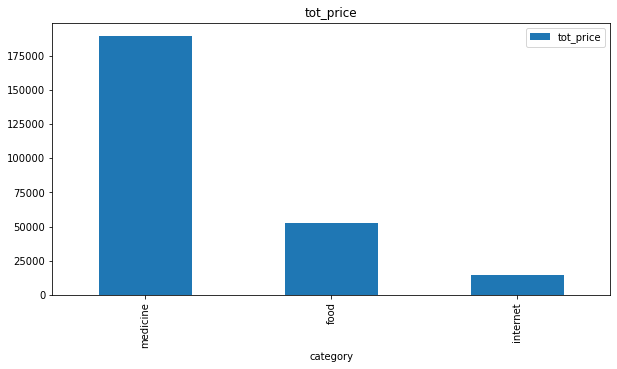

In [126]:
saled.plot(x='category', y='tot_price', kind='bar', title='tot_price', figsize=(10, 5));

## Task 3
3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [127]:
big_df.groupby(['category', 'good_name'], sort=False, as_index=False)['tot_price'].max().drop_duplicates(subset=['category'])

,category,good_name,tot_price
0,medicine,applications,92950.0
2,food,plastic,1575.0
6,internet,wooden,3075.0


## Task 4
4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [136]:

def task4(group):
    print(big_df[['count', 'tot_price']][big_df['category'] == group].sum())

interact(task4, group=list(set(big_df['category'][big_df['sale'] == 'yes'])));

interactive(children=(Dropdown(description='group', options=('medicine',), value='medicine'), Output()), _dom_…

<function __main__.task4(group)>

## Task 5
5. Отримати загальну суму ПРОДАНИХ товарiв.


In [142]:
big_df['tot_price'].sum()

256758.5

# Task 6
6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [143]:
big_df[['category', 'good_name']][big_df['count'] == 0].sort_values(by=['category'])

,category,good_name
